# ЛШКН День 2. Теория. Введение в Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Ввведение в pandas

Базовые объекты pandas это **Series** и **DataFrame** 

### Series – одномерный список разнородных объектов

In [2]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Которые можно индексировать

In [3]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object

Также инициализировать dict-ом

In [4]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

Индексация аналогичная numpy

In [5]:
cities['Chicago']

1000.0

In [6]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [7]:
cities[cities < 1000]

Austin      450.0
Portland    900.0
dtype: float64

In [8]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
print(cities[less_than_1000])

Austin            True
Boston           False
Chicago          False
New York         False
Portland          True
San Francisco    False
dtype: bool


Austin      450.0
Portland    900.0
dtype: float64


In [9]:
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

('Old value:', 1000.0)
('New value:', 1400.0)


In [10]:
print(cities)
print('\n')
cities[cities < 1000] = 750

print(cities)

Austin            450.0
Boston              NaN
Chicago          1400.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64


Austin            750.0
Boston              NaN
Chicago          1400.0
New York         1300.0
Portland          750.0
San Francisco    1100.0
dtype: float64


Всё, что работает для dict-а *возможно* работет и для Series

In [11]:
print('Seattle' in cities)
print('San Francisco' in cities)

False
True


Всё, что работает для np.array *возможно* работет и для Series

In [12]:
cities / 3

Austin           250.000000
Boston                  NaN
Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
dtype: float64

In [13]:
np.square(cities)

Austin            562500.0
Boston                 NaN
Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

Если сложить два Series, на пересечениях произойдёт сложение, в остальных случаях будет NaN

In [14]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


### DataFrame – двумерная таблица разнородных объектов

In [15]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data)
football

losses     team  wins  year
0       5    Bears    11  2010
1       8    Bears     8  2011
2       6    Bears    10  2012
3       1  Packers    15  2011
4       5  Packers    11  2012
5      10    Lions     6  2010
6       6    Lions    10  2011
7      12    Lions     4  2012

Порядок колонок можно задать опцией columns

In [16]:
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

year     team  wins  losses
0  2010    Bears    11       5
1  2011    Bears     8       8
2  2012    Bears    10       6
3  2011  Packers    15       1
4  2012  Packers    11       5
5  2010    Lions     6      10
6  2011    Lions    10       6
7  2012    Lions     4      12

In [25]:
lens = pd.read_csv('movie_lens.csv')

In [26]:
lens.tail()

movie_id                       title release_date  video_release_date  \
99995       748           Saint, The (1997)  14-Mar-1997                 NaN   
99996       751  Tomorrow Never Dies (1997)  01-Jan-1997                 NaN   
99997       879      Peacemaker, The (1997)  01-Jan-1997                 NaN   
99998       894         Home Alone 3 (1997)  01-Jan-1997                 NaN   
99999       901            Mr. Magoo (1997)  25-Dec-1997                 NaN   

                                                imdb_url  user_id  rating  \
99995  http://us.imdb.com/M/title-exact?Saint%2C%20Th...      729       4   
99996  http://us.imdb.com/M/title-exact?imdb-title-12...      729       3   
99997  http://us.imdb.com/M/title-exact?Peacemaker%2C...      729       3   
99998  http://us.imdb.com/M/title-exact?imdb-title-11...      729       1   
99999  http://us.imdb.com/M/title-exact?imdb-title-11...      729       1   

       unix_timestamp  age sex occupation zip_code  
99995       893286638   19   M    student    56567  
99996       893286338   19   M    student    56567  
99997       893286299   19   M    student    56567  
99998       893286511   19   M    student    56567  
99999       893286491   19   M    student    56567

In [27]:
lens[1001:1004]

movie_id                       title release_date  video_release_date  \
1001        11        Seven (Se7en) (1995)  01-Jan-1995                 NaN   
1002        12  Usual Suspects, The (1995)  14-Aug-1995                 NaN   
1003        15   Mr. Holland's Opus (1995)  29-Jan-1996                 NaN   

                                               imdb_url  user_id  rating  \
1001    http://us.imdb.com/M/title-exact?Se7en%20(1995)      109       4   
1002  http://us.imdb.com/M/title-exact?Usual%20Suspe...      109       4   
1003  http://us.imdb.com/M/title-exact?Mr.%20Holland...      109       4   

      unix_timestamp  age sex occupation zip_code  
1001       880572786   29   M      other    55423  
1002       880577542   29   M      other    55423  
1003       880577868   29   M      other    55423

In [28]:
lens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
movie_id              100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
user_id               100000 non-null int64
rating                100000 non-null int64
unix_timestamp        100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
occupation            100000 non-null object
zip_code              100000 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 9.2+ MB


In [29]:
lens.describe()

movie_id  video_release_date       user_id         rating  \
count  100000.000000                 0.0  100000.00000  100000.000000   
mean      425.530130                 NaN     462.48475       3.529860   
std       330.798356                 NaN     266.61442       1.125674   
min         1.000000                 NaN       1.00000       1.000000   
25%       175.000000                 NaN     254.00000       3.000000   
50%       322.000000                 NaN     447.00000       4.000000   
75%       631.000000                 NaN     682.00000       4.000000   
max      1682.000000                 NaN     943.00000       5.000000   

       unix_timestamp            age  
count    1.000000e+05  100000.000000  
mean     8.835289e+08      32.969850  
std      5.343856e+06      11.562623  
min      8.747247e+08       7.000000  
25%      8.794487e+08      24.000000  
50%      8.828269e+08      30.000000  
75%      8.882600e+08      40.000000  
max      8.932866e+08      73.000000

In [30]:
columns_to_use = ['movie_id', 'user_id', 'rating']
lens[columns_to_use].head()

movie_id  user_id  rating
0         1      308       4
1         4      308       5
2         5      308       4
3         7      308       4
4         8      308       5

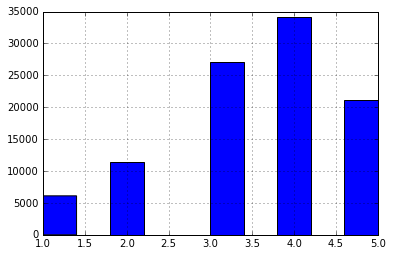

In [32]:
lens.rating.hist()

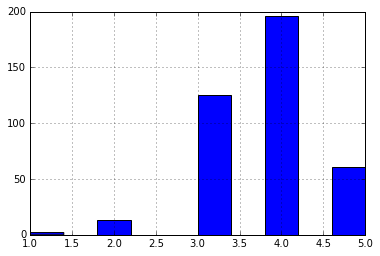

In [33]:
lens[lens['user_id'] == 308].rating.hist()

In [34]:
lens_308 = lens[lens['user_id'] == 308].copy()
lens_308.sort_values(by='unix_timestamp', inplace=True)
lens_308.reset_index(inplace=True)

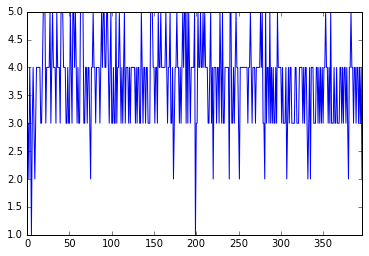

In [35]:
lens_308.rating.plot()

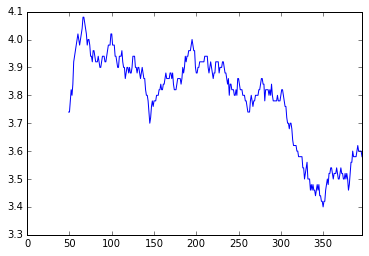

In [36]:
smoothed_ratings = lens_308.rating.rolling(window=50).mean()
smoothed_ratings.plot()

## Чистка данных с помощью pandas

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python_reference/master/Data/some_soccer_data.csv')
df

PLAYER  SALARY    GP   G     A  SOT  \
0      Sergio Agüero\n Forward — Manchester City  $19.2m  16.0  14   3.0   34   
1               Eden Hazard\n Midfield — Chelsea  $18.9m  21.0   8   4.0   17   
2             Alexis Sánchez\n Forward — Arsenal  $17.6m   NaN  12   7.0   29   
3        Yaya Touré\n Midfield — Manchester City  $16.6m  18.0   7   1.0   19   
4  Ángel Di María\n Midfield — Manchester United  $15.0m  13.0   3   NaN   13   
5          Santiago Cazorla\n Midfield — Arsenal  $14.8m  20.0   4   NaN   20   
6       David Silva\n Midfield — Manchester City  $14.3m  15.0   6   2.0   11   
7             Cesc Fàbregas\n Midfield — Chelsea  $14.0m  20.0   2  14.0   10   
8           Saido Berahino\n Forward — West Brom  $13.8m  21.0   9   0.0   20   
9          Steven Gerrard\n Midfield — Liverpool  $13.8m  20.0   5   1.0   11   

     PPG       P  
0  13.12  209.98  
1  13.05  274.04  
2  11.19  223.86  
3  10.99  197.91  
4  10.17  132.23  
5   9.97     NaN  
6  10.35  155.26  
7  10.47  209.49  
8   7.02  147.43  
9   7.50  150.01

In [38]:
df.columns = [c.lower() for c in df.columns]
df.tail(3)

player  salary    gp  g     a  sot    ppg  \
7     Cesc Fàbregas\n Midfield — Chelsea  $14.0m  20.0  2  14.0   10  10.47   
8   Saido Berahino\n Forward — West Brom  $13.8m  21.0  9   0.0   20   7.02   
9  Steven Gerrard\n Midfield — Liverpool  $13.8m  20.0  5   1.0   11   7.50   

        p  
7  209.49  
8  147.43  
9  150.01

In [39]:
df = df.rename(columns={'p': 'points', 
                        'gp': 'games',
                        'sot': 'shots_on_target',
                        'g': 'goals',
                        'ppg': 'points_per_game',
                        'a': 'assists',})

df.tail(3)

player  salary  games  goals  assists  \
7     Cesc Fàbregas\n Midfield — Chelsea  $14.0m   20.0      2     14.0   
8   Saido Berahino\n Forward — West Brom  $13.8m   21.0      9      0.0   
9  Steven Gerrard\n Midfield — Liverpool  $13.8m   20.0      5      1.0   

   shots_on_target  points_per_game  points  
7               10            10.47  209.49  
8               20             7.02  147.43  
9               11             7.50  150.01

In [40]:
df['salary'] = df['salary'].apply(lambda x: x.strip('$m'))
df['salary'] = df['salary'].astype(float)
df.tail()

player  salary  games  goals  assists  \
5     Santiago Cazorla\n Midfield — Arsenal    14.8   20.0      4      NaN   
6  David Silva\n Midfield — Manchester City    14.3   15.0      6      2.0   
7        Cesc Fàbregas\n Midfield — Chelsea    14.0   20.0      2     14.0   
8      Saido Berahino\n Forward — West Brom    13.8   21.0      9      0.0   
9     Steven Gerrard\n Midfield — Liverpool    13.8   20.0      5      1.0   

   shots_on_target  points_per_game  points  
5               20             9.97     NaN  
6               11            10.35  155.26  
7               10            10.47  209.49  
8               20             7.02  147.43  
9               11             7.50  150.01

Два разных способа вставить колонку

In [41]:
df['team'] = pd.Series('', index=df.index)
df.insert(loc=8, column='position', value='') 
df.tail(3)

player  salary  games  goals  assists  \
7     Cesc Fàbregas\n Midfield — Chelsea    14.0   20.0      2     14.0   
8   Saido Berahino\n Forward — West Brom    13.8   21.0      9      0.0   
9  Steven Gerrard\n Midfield — Liverpool    13.8   20.0      5      1.0   

   shots_on_target  points_per_game  points position team  
7               10            10.47  209.49                
8               20             7.02  147.43                
9               11             7.50  150.01

In [42]:
def process_player_col(text):
    name, rest = text.split('\n')
    position, team = [x.strip() for x in rest.split(' — ')]
    return pd.Series([name, team, position])

df[['player', 'team', 'position']] = df.player.apply(process_player_col)    
df.tail(3)

player  salary  games  goals  assists  shots_on_target  \
7   Cesc Fàbregas    14.0   20.0      2     14.0               10   
8  Saido Berahino    13.8   21.0      9      0.0               20   
9  Steven Gerrard    13.8   20.0      5      1.0               11   

   points_per_game  points  position       team  
7            10.47  209.49  Midfield    Chelsea  
8             7.02  147.43   Forward  West Brom  
9             7.50  150.01  Midfield  Liverpool

In [43]:
cols = ['player', 'position', 'team']
df[cols] = df[cols].applymap(lambda x: x.lower())
df.head()

player  salary  games  goals  assists  shots_on_target  \
0   sergio agüero    19.2   16.0     14      3.0               34   
1     eden hazard    18.9   21.0      8      4.0               17   
2  alexis sánchez    17.6    NaN     12      7.0               29   
3      yaya touré    16.6   18.0      7      1.0               19   
4  Ángel di maría    15.0   13.0      3      NaN               13   

   points_per_game  points  position               team  
0            13.12  209.98   forward    manchester city  
1            13.05  274.04  midfield            chelsea  
2            11.19  223.86   forward            arsenal  
3            10.99  197.91  midfield    manchester city  
4            10.17  132.23  midfield  manchester united

Сколько строк содержит nan?

In [44]:
nans = df.shape[0] - df.dropna().shape[0]
print('%d rows have missing values' % nans)

3 rows have missing values


Какие строки содержат NaN в assists?

In [45]:
df[df['assists'].isnull()]

player  salary  games  goals  assists  shots_on_target  \
4    Ángel di maría    15.0   13.0      3      NaN               13   
5  santiago cazorla    14.8   20.0      4      NaN               20   

   points_per_game  points  position               team  
4            10.17  132.23  midfield  manchester united  
5             9.97     NaN  midfield            arsenal

Оставим только их

In [46]:
df[df['assists'].notnull()]

player  salary  games  goals  assists  shots_on_target  \
0   sergio agüero    19.2   16.0     14      3.0               34   
1     eden hazard    18.9   21.0      8      4.0               17   
2  alexis sánchez    17.6    NaN     12      7.0               29   
3      yaya touré    16.6   18.0      7      1.0               19   
6     david silva    14.3   15.0      6      2.0               11   
7   cesc fàbregas    14.0   20.0      2     14.0               10   
8  saido berahino    13.8   21.0      9      0.0               20   
9  steven gerrard    13.8   20.0      5      1.0               11   

   points_per_game  points  position             team  
0            13.12  209.98   forward  manchester city  
1            13.05  274.04  midfield          chelsea  
2            11.19  223.86   forward          arsenal  
3            10.99  197.91  midfield  manchester city  
6            10.35  155.26  midfield  manchester city  
7            10.47  209.49  midfield          chelsea  
8             7.02  147.43   forward        west brom  
9             7.50  150.01  midfield        liverpool

А отсутствующие игры заполним нулями:

In [47]:
df.fillna(value=0, inplace=True)
df

player  salary  games  goals  assists  shots_on_target  \
0     sergio agüero    19.2   16.0     14      3.0               34   
1       eden hazard    18.9   21.0      8      4.0               17   
2    alexis sánchez    17.6    0.0     12      7.0               29   
3        yaya touré    16.6   18.0      7      1.0               19   
4    Ángel di maría    15.0   13.0      3      0.0               13   
5  santiago cazorla    14.8   20.0      4      0.0               20   
6       david silva    14.3   15.0      6      2.0               11   
7     cesc fàbregas    14.0   20.0      2     14.0               10   
8    saido berahino    13.8   21.0      9      0.0               20   
9    steven gerrard    13.8   20.0      5      1.0               11   

   points_per_game  points  position               team  
0            13.12  209.98   forward    manchester city  
1            13.05  274.04  midfield            chelsea  
2            11.19  223.86   forward            arsenal  
3            10.99  197.91  midfield    manchester city  
4            10.17  132.23  midfield  manchester united  
5             9.97    0.00  midfield            arsenal  
6            10.35  155.26  midfield    manchester city  
7            10.47  209.49  midfield            chelsea  
8             7.02  147.43   forward          west brom  
9             7.50  150.01  midfield          liverpool

Отсортируем по полю goals

In [48]:
df.sort_values(by='goals', ascending=False, inplace=True)
df.head()

player  salary  games  goals  assists  shots_on_target  \
0   sergio agüero    19.2   16.0     14      3.0               34   
2  alexis sánchez    17.6    0.0     12      7.0               29   
8  saido berahino    13.8   21.0      9      0.0               20   
1     eden hazard    18.9   21.0      8      4.0               17   
3      yaya touré    16.6   18.0      7      1.0               19   

   points_per_game  points  position             team  
0            13.12  209.98   forward  manchester city  
2            11.19  223.86   forward          arsenal  
8             7.02  147.43   forward        west brom  
1            13.05  274.04  midfield          chelsea  
3            10.99  197.91  midfield  manchester city

И поменяем индексы

In [49]:
df.index = range(1,len(df.index)+1)
df.head()

player  salary  games  goals  assists  shots_on_target  \
1   sergio agüero    19.2   16.0     14      3.0               34   
2  alexis sánchez    17.6    0.0     12      7.0               29   
3  saido berahino    13.8   21.0      9      0.0               20   
4     eden hazard    18.9   21.0      8      4.0               17   
5      yaya touré    16.6   18.0      7      1.0               19   

   points_per_game  points  position             team  
1            13.12  209.98   forward  manchester city  
2            11.19  223.86   forward          arsenal  
3             7.02  147.43   forward        west brom  
4            13.05  274.04  midfield          chelsea  
5            10.99  197.91  midfield  manchester city

Индексами могут быть строки

In [50]:
df.set_index('player', inplace=True)
df.head()

salary  games  goals  assists  shots_on_target  \
player                                                           
sergio agüero     19.2   16.0     14      3.0               34   
alexis sánchez    17.6    0.0     12      7.0               29   
saido berahino    13.8   21.0      9      0.0               20   
eden hazard       18.9   21.0      8      4.0               17   
yaya touré        16.6   18.0      7      1.0               19   

                points_per_game  points  position             team  
player                                                              
sergio agüero             13.12  209.98   forward  manchester city  
alexis sánchez            11.19  223.86   forward          arsenal  
saido berahino             7.02  147.43   forward        west brom  
eden hazard               13.05  274.04  midfield          chelsea  
yaya touré                10.99  197.91  midfield  manchester city

Вернём назад

In [51]:
df.reset_index(inplace=True)
df.head(3)

player  salary  games  goals  assists  shots_on_target  \
0   sergio agüero    19.2   16.0     14      3.0               34   
1  alexis sánchez    17.6    0.0     12      7.0               29   
2  saido berahino    13.8   21.0      9      0.0               20   

   points_per_game  points position             team  
0            13.12  209.98  forward  manchester city  
1            11.19  223.86  forward          arsenal  
2             7.02  147.43  forward        west brom

Слайсинг по нескольким условиям

In [52]:
df[ (df['team'] == 'arsenal') | (df['team'] == 'chelsea') ]

player  salary  games  goals  assists  shots_on_target  \
1    alexis sánchez    17.6    0.0     12      7.0               29   
3       eden hazard    18.9   21.0      8      4.0               17   
7  santiago cazorla    14.8   20.0      4      0.0               20   
9     cesc fàbregas    14.0   20.0      2     14.0               10   

   points_per_game  points  position     team  
1            11.19  223.86   forward  arsenal  
3            13.05  274.04  midfield  chelsea  
7             9.97    0.00  midfield  arsenal  
9            10.47  209.49  midfield  chelsea

In [53]:
df[ (df['team'] == 'arsenal') & (df['position'] == 'forward') ]

player  salary  games  goals  assists  shots_on_target  \
1  alexis sánchez    17.6    0.0     12      7.0               29   

   points_per_game  points position     team  
1            11.19  223.86  forward  arsenal